# 군집화 (Clustering)

* 대표적인 `비지도학습` 알고리즘
* 레이블이 없는 데이터를 그룹화하는 알고리즘
* 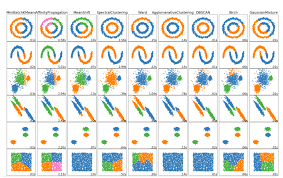

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

from sklearn import cluster
from sklearn import mixture
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

/var/folders/9q/y4ybk96d7nb9d0spg4xhbx7m0000gn/T/ipykernel_19567/3944844025.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-whitegrid'])


## 데이터 생성

In [3]:
def plot_data(dataset, position, title) :
    X, y = dataset 
    plt.subplot(position)
    plt.title(title)
    plt.scatter(X[:, 0], X[:, 1])

In [4]:
np.random.seed(0)
n_samples = 1500
random_state = 0
noise = 0.05

In [5]:
circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=noise, random_state=random_state)
moons = datasets.make_moons(n_samples=n_samples, noise=noise, random_state=random_state)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
no_structures = np.random.rand(n_samples, 2), None

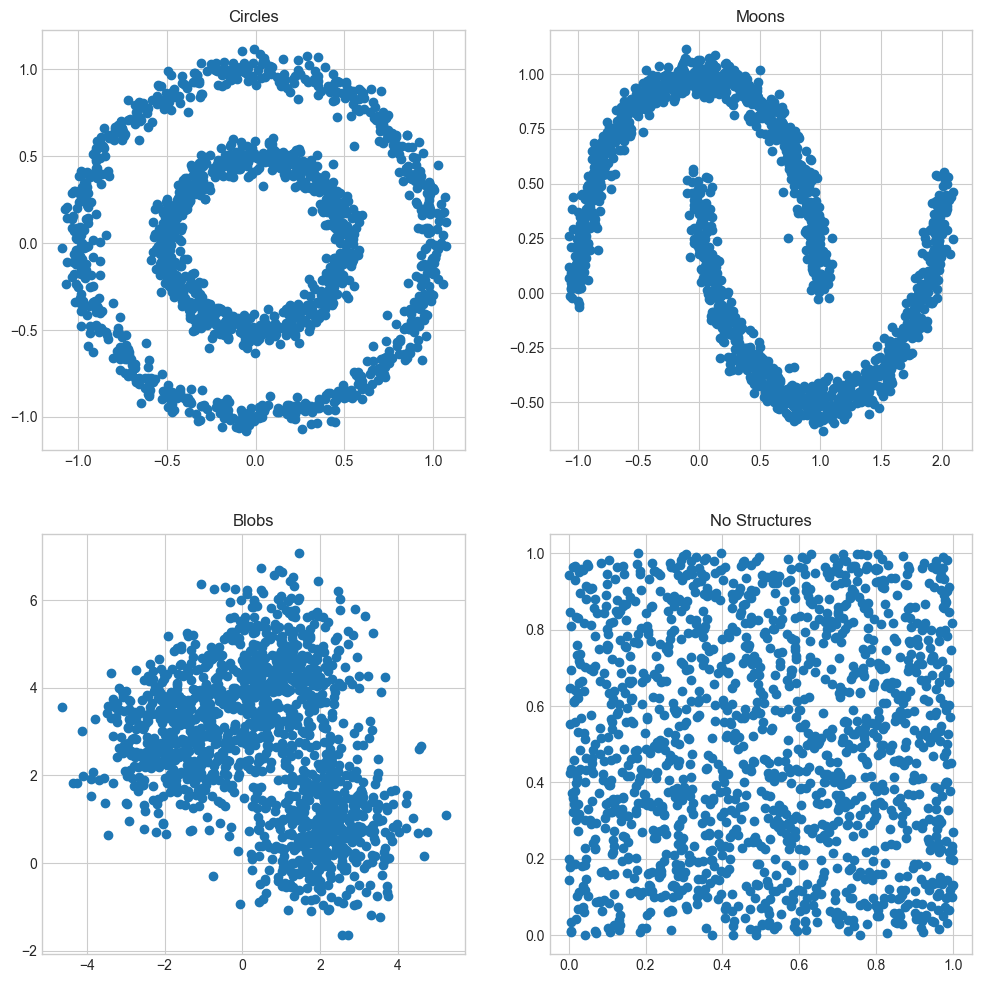

In [6]:
plt.figure(figsize=(12, 12))
plot_data(circles, 221, 'Circles')
plot_data(moons, 222, 'Moons')
plot_data(blobs, 223, 'Blobs')
plot_data(no_structures, 224, 'No Structures')

In [7]:
# fit, predict, plot 모두 해주는 함수
import numpy as np
def fit_predict_plot(model, dataset, position, title) :
    X, y = dataset
    model.fit(X)
    if hasattr(model, 'labels_'):
        labels = model.labels_.astype(np.int64)
    else :
        labels = model.predict(X)

    # 시각적으로 분리되도록 색깔 조합을 잘 정해야 한다.
    colors = np.array(['#30A9DE', '#E53A40', '#090707', '#A593E0', '#F6B352', '#519D9E', '#D81159', '#8CD790', '#34314c'])
    ax = plt.subplot(position);
    ax.set_title(title);
    ax.scatter(X[:, 0], X[:, 1], color=colors[labels]);

## K-평균 (K-Means)

* n개의 등분산 그룹으로 군집화
* 제곱합 함수를 최소화
* 군집화 개수(K : hyper parameter)를 지정해야 한다.
* 각 군집 $C$의 평균 $\mu_j$을 중심점 이라고 함
* 다음을 만족하는 중심점을 찾는것이 목표 (Centroid : 클러스터의 중심점)

\begin{equation}
\sum_{i=0}^{n} \underset{\mu_j \in C}{\min} (||x_i - \mu_j||^2)
\end{equation}

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to '

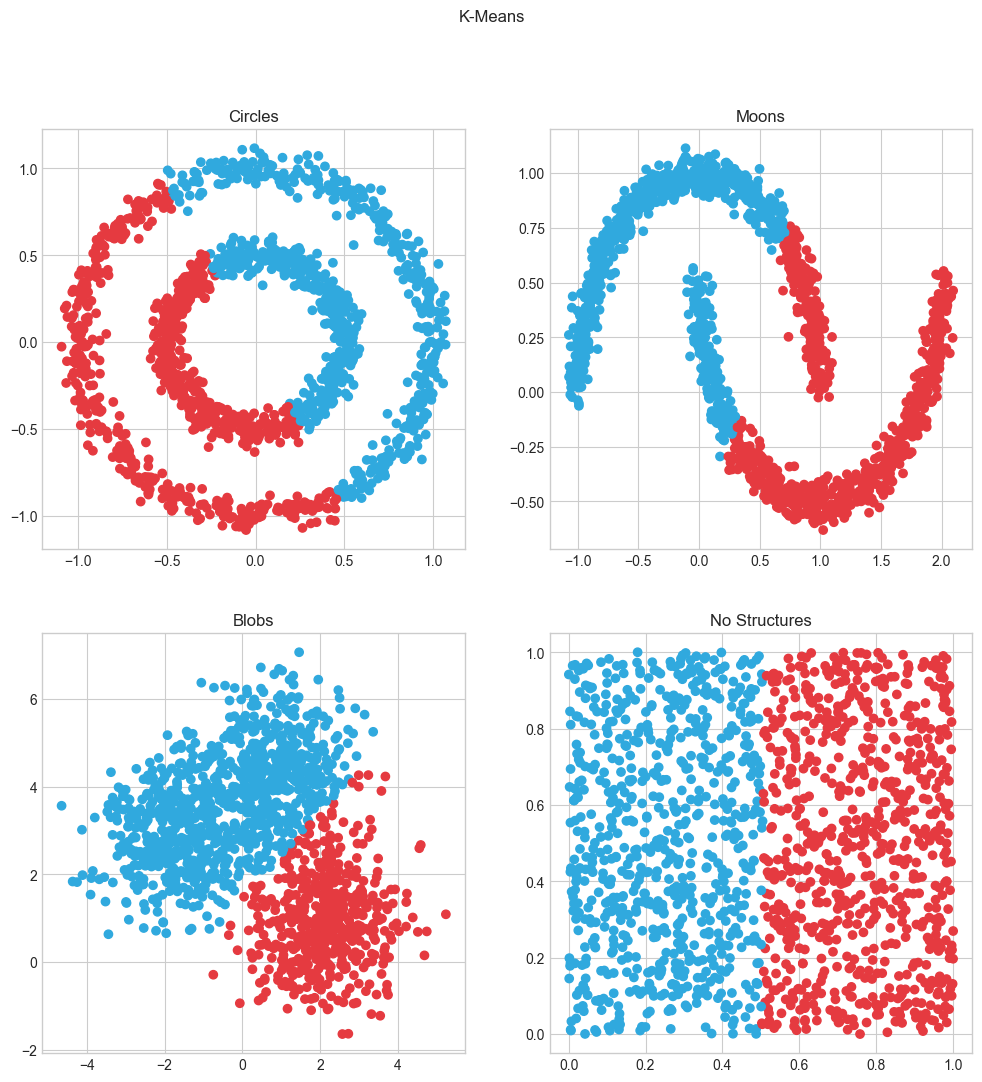

In [8]:
fig = plt.figure(figsize=(12, 12))
fig.suptitle('K-Means')

fit_predict_plot(cluster.KMeans(n_clusters=2, random_state=random_state), circles, 221, 'Circles')
fit_predict_plot(cluster.KMeans(n_clusters=2, random_state=random_state), moons, 222, 'Moons')
fit_predict_plot(cluster.KMeans(n_clusters=2, random_state=random_state), blobs, 223, 'Blobs')
fit_predict_plot(cluster.KMeans(n_clusters=2, random_state=random_state), no_structures, 224, 'No Structures')


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to '

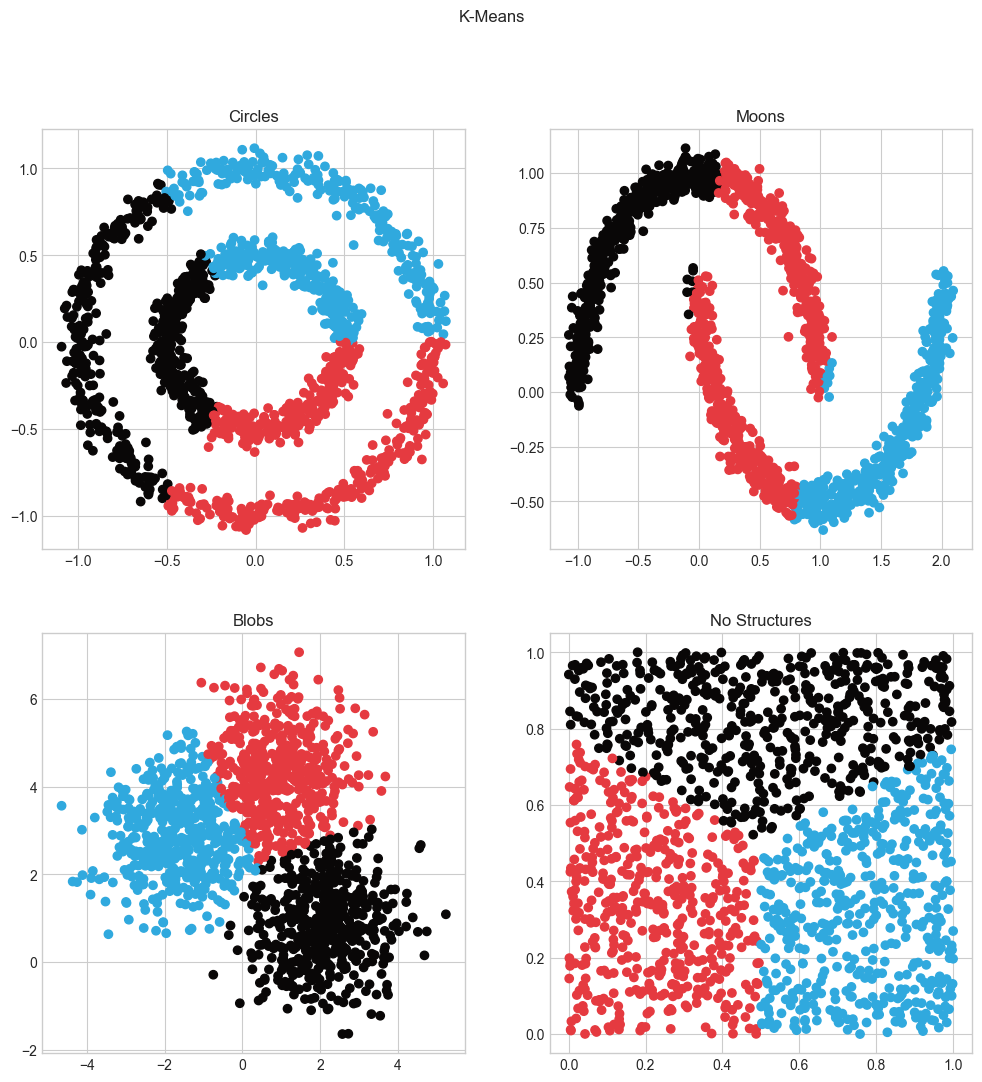

In [9]:
fig = plt.figure(figsize=(12, 12))
fig.suptitle('K-Means')

fit_predict_plot(cluster.KMeans(n_clusters=3, random_state=random_state), circles, 221, 'Circles')
fit_predict_plot(cluster.KMeans(n_clusters=3, random_state=random_state), moons, 222, 'Moons')
fit_predict_plot(cluster.KMeans(n_clusters=3, random_state=random_state), blobs, 223, 'Blobs')
fit_predict_plot(cluster.KMeans(n_clusters=3, random_state=random_state), no_structures, 224, 'No Structures')


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to '

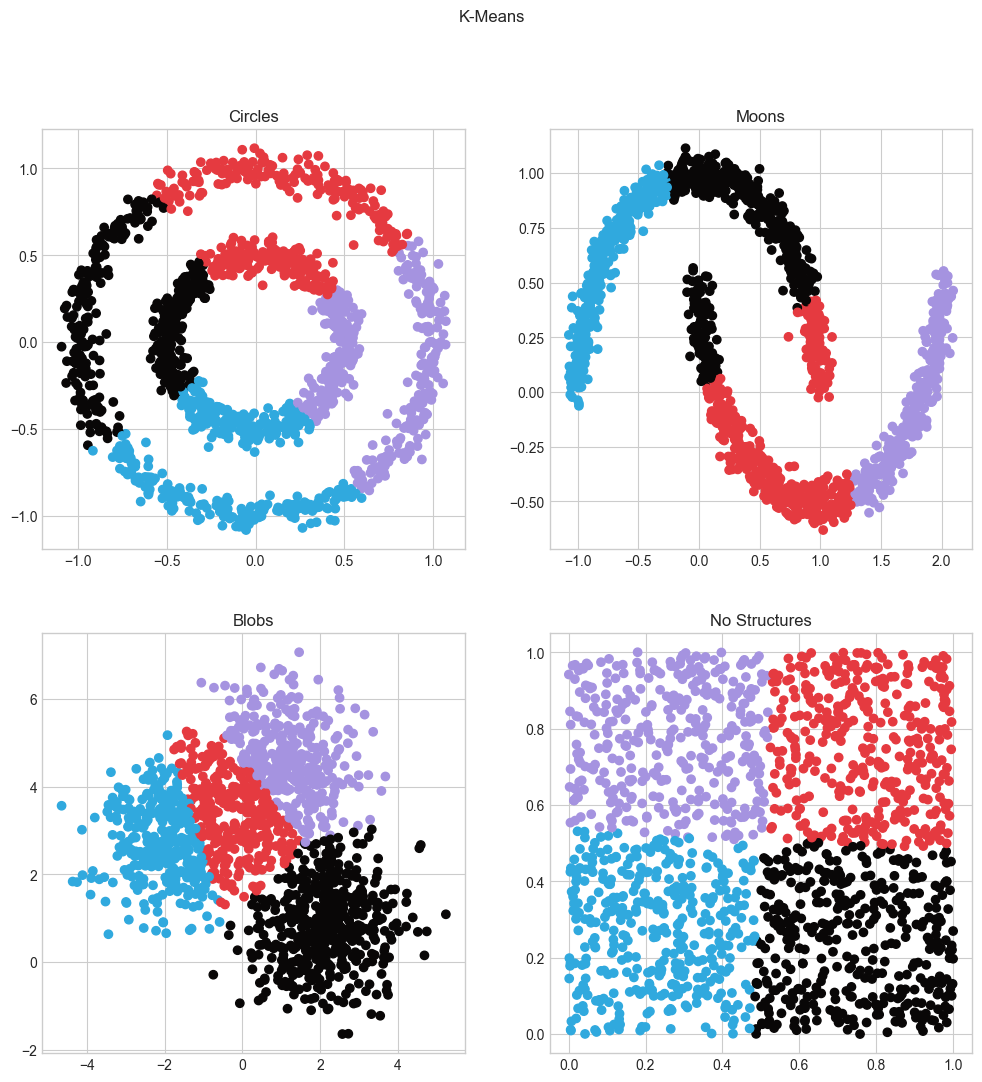

In [10]:
fig = plt.figure(figsize=(12, 12))
fig.suptitle('K-Means')

fit_predict_plot(cluster.KMeans(n_clusters=4, random_state=random_state), circles, 221, 'Circles')
fit_predict_plot(cluster.KMeans(n_clusters=4, random_state=random_state), moons, 222, 'Moons')
fit_predict_plot(cluster.KMeans(n_clusters=4, random_state=random_state), blobs, 223, 'Blobs')
fit_predict_plot(cluster.KMeans(n_clusters=4, random_state=random_state), no_structures, 224, 'No Structures')


### 붓꽃 데이터 군집화
* K-Means 알고리즘을 사용해 붓꽃 데이터를 군집화 해본다.
* 같은 종류의 붓꽃끼리 잘 군집화가 되었다.

In [11]:
from sklearn.datasets import load_iris

iris = load_iris()

In [12]:
model = cluster.KMeans(n_clusters=3) # 붓꽃 데이터의 target 종류가 3개니까
model.fit(iris.data)
predict = model.predict(iris.data)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [13]:
idx = np.where(predict==0) 
iris.target[idx]

array([1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [14]:
idx = np.where(predict==1)
iris.target[idx]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [15]:
idx = np.where(predict==2)
iris.target[idx]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## 미니 배치 K-평균 (Mini Batch K-Means)

* 배치 처리를 통해 계산 시간을 줄인 K-평균
* K-평균과 다른 결과가 나올 수 있다.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto

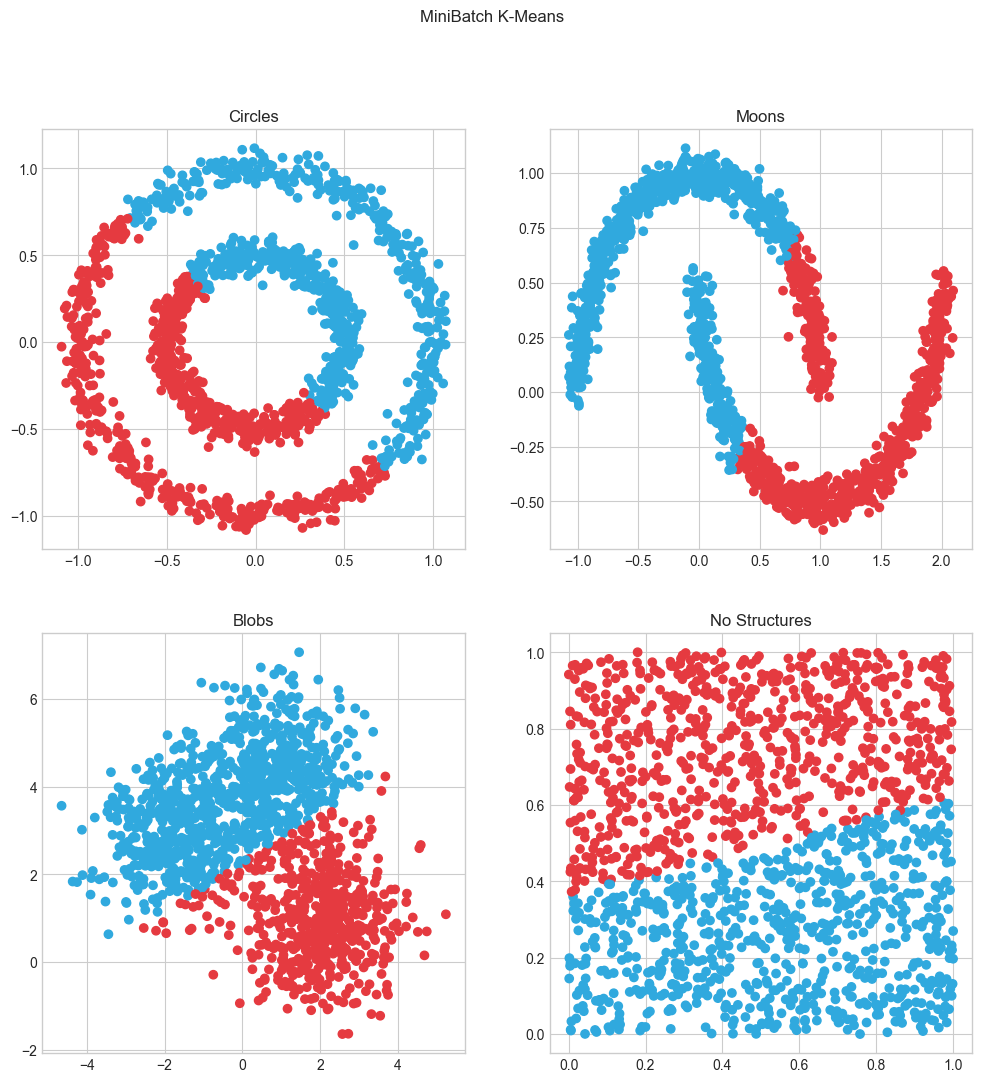

In [16]:
fig = plt.figure(figsize=(12, 12))
fig.suptitle('MiniBatch K-Means')

fit_predict_plot(cluster.MiniBatchKMeans(n_clusters=2, random_state=random_state), circles, 221, 'Circles')
fit_predict_plot(cluster.MiniBatchKMeans(n_clusters=2, random_state=random_state), moons, 222, 'Moons')
fit_predict_plot(cluster.MiniBatchKMeans(n_clusters=2, random_state=random_state), blobs, 223, 'Blobs')
fit_predict_plot(cluster.MiniBatchKMeans(n_clusters=2, random_state=random_state), no_structures, 224, 'No Structures')


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto

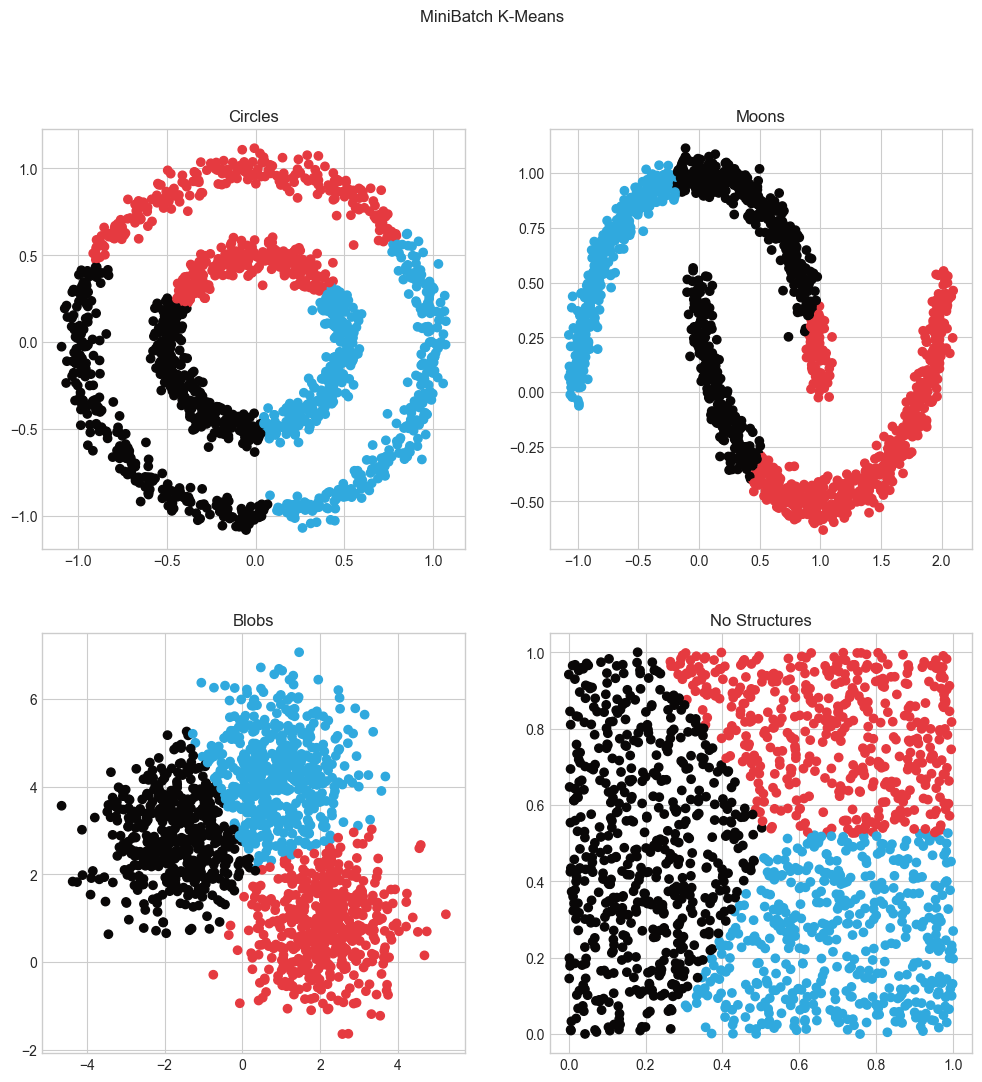

In [17]:
fig = plt.figure(figsize=(12, 12))
fig.suptitle('MiniBatch K-Means')

fit_predict_plot(cluster.MiniBatchKMeans(n_clusters=3, random_state=random_state), circles, 221, 'Circles')
fit_predict_plot(cluster.MiniBatchKMeans(n_clusters=3, random_state=random_state), moons, 222, 'Moons')
fit_predict_plot(cluster.MiniBatchKMeans(n_clusters=3, random_state=random_state), blobs, 223, 'Blobs')
fit_predict_plot(cluster.MiniBatchKMeans(n_clusters=3, random_state=random_state), no_structures, 224, 'No Structures')


## Affinity Propagation

* 샘플 쌍 끼리 메시지를 보내 군집을 생성
* `샘플을 대표하는 적절한 예를 찾을 때까지 반복`
* 군집의 갯수를 자동으로 정함 (KMeans처럼 정해주지 않는다.)

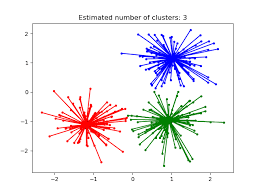

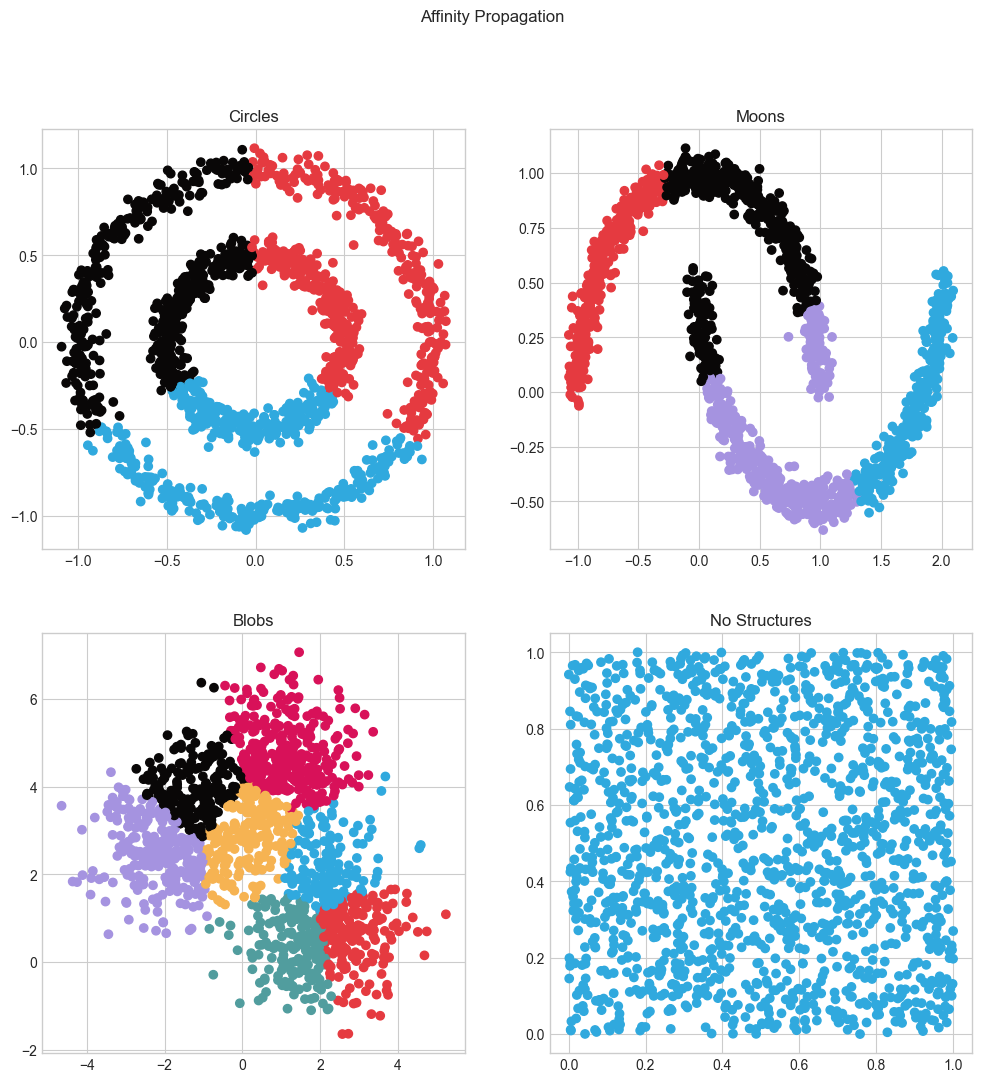

In [18]:
fig = plt.figure(figsize=(12, 12))
fig.suptitle('Affinity Propagation')

fit_predict_plot(cluster.AffinityPropagation(damping=0.9, preference=-200), circles, 221, 'Circles')
fit_predict_plot(cluster.AffinityPropagation(damping=0.9, preference=-200), moons, 222, 'Moons')
fit_predict_plot(cluster.AffinityPropagation(damping=0.9, preference=-200), blobs, 223, 'Blobs')
fit_predict_plot(cluster.AffinityPropagation(damping=0.9, preference=-200), no_structures, 224, 'No Structures')

# 자동으로 나뉘어진 것을 알 수 있다. 
# No Structures data들은 군집을 지을만한 특징이 없다고 파악할 수 있다. (랜덤으로 만든 데이터였으니까)


## Mean Shift

* 중심점 후보를 정해진 구역 내 평균으로 업데이트

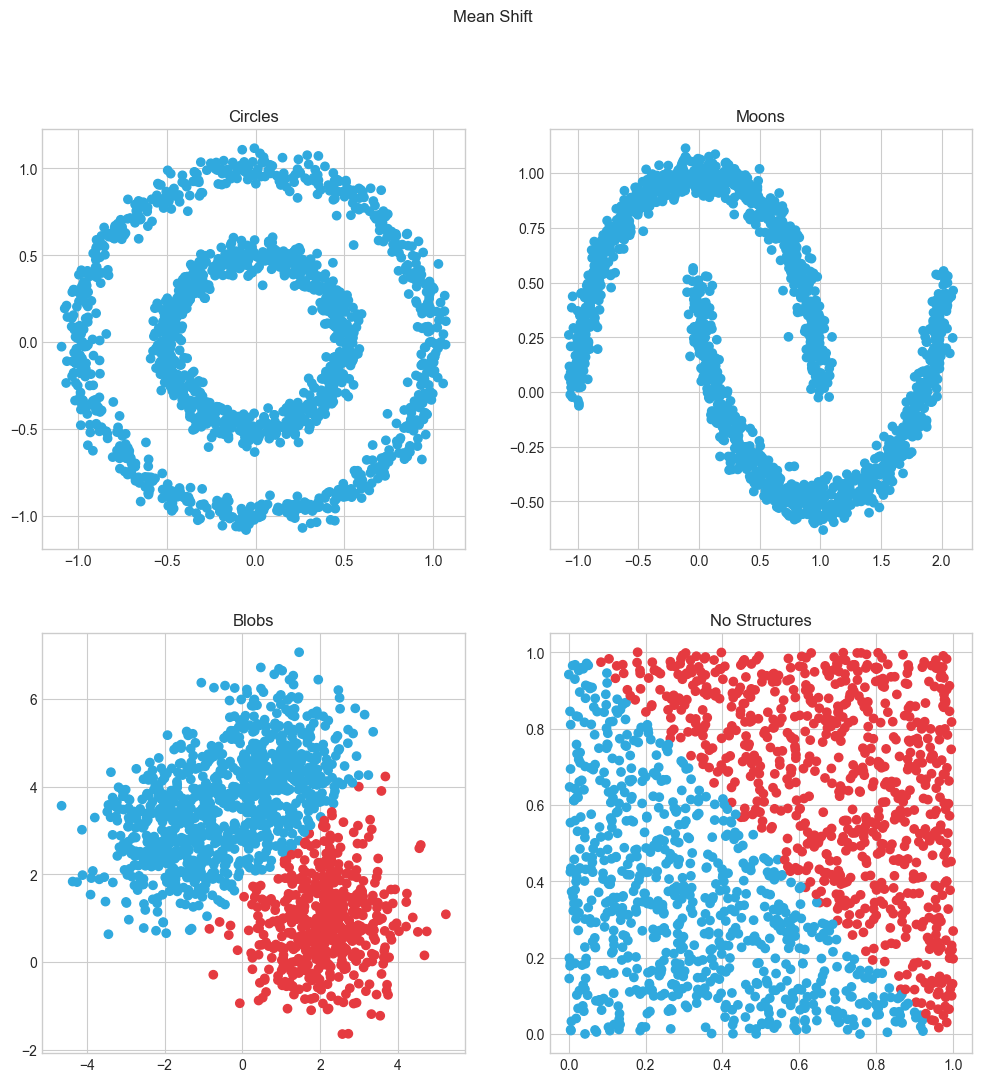

In [19]:
fig = plt.figure(figsize=(12, 12))
fig.suptitle('Mean Shift')

fit_predict_plot(cluster.MeanShift(), circles, 221, 'Circles')
fit_predict_plot(cluster.MeanShift(), moons, 222, 'Moons')
fit_predict_plot(cluster.MeanShift(), blobs, 223, 'Blobs')
fit_predict_plot(cluster.MeanShift(), no_structures, 224, 'No Structures')

# 자동으로 나뉘어진 것을 알 수 있다. 
# No Structures data들은 군집을 지을만한 특징이 없다고 파악할 수 있다. (랜덤으로 만든 데이터였으니까)


## 스펙트럼 군집화 (Spectral Clustering)

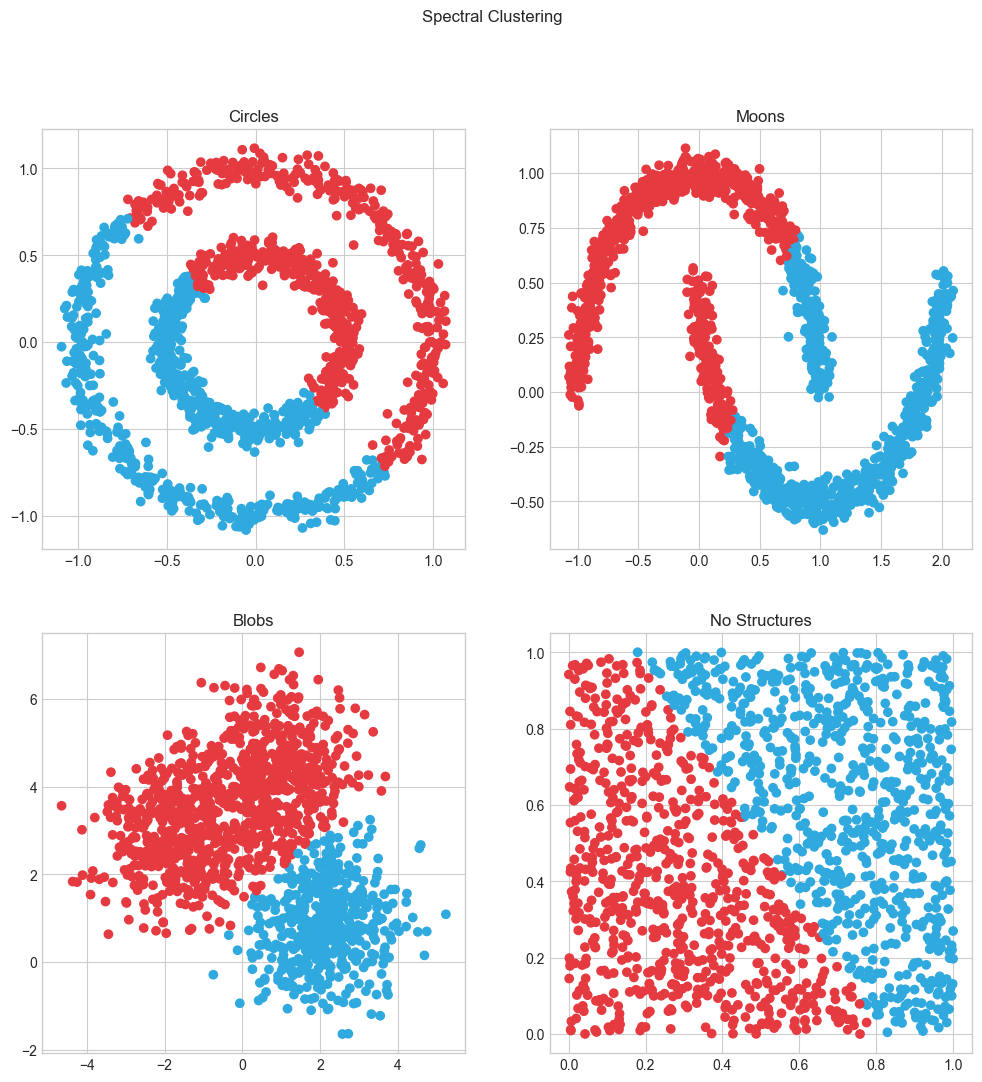

In [20]:
fig = plt.figure(figsize=(12, 12))
fig.suptitle('Spectral Clustering')

fit_predict_plot(cluster.SpectralClustering(n_clusters=2, random_state=random_state), circles, 221, 'Circles')
fit_predict_plot(cluster.SpectralClustering(n_clusters=2, random_state=random_state), moons, 222, 'Moons')
fit_predict_plot(cluster.SpectralClustering(n_clusters=2, random_state=random_state), blobs, 223, 'Blobs')
fit_predict_plot(cluster.SpectralClustering(n_clusters=2, random_state=random_state), no_structures, 224, 'No Structures')

# 자동으로 나뉘어진 것을 알 수 있다. 
# No Structures data들은 군집을 지을만한 특징이 없다고 파악할 수 있다. (랜덤으로 만든 데이터였으니까)


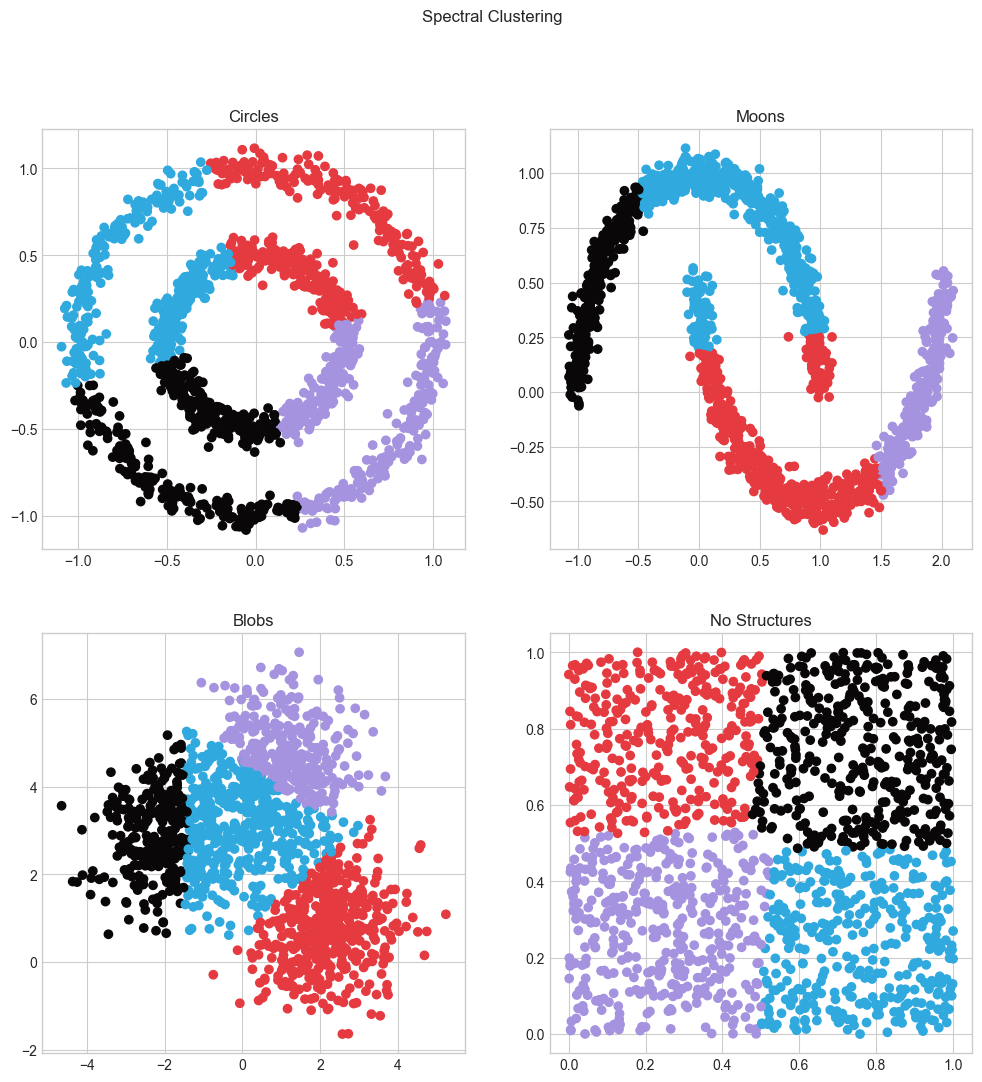

In [21]:
fig = plt.figure(figsize=(12, 12))
fig.suptitle('Spectral Clustering')

fit_predict_plot(cluster.SpectralClustering(n_clusters=4, random_state=random_state), circles, 221, 'Circles')
fit_predict_plot(cluster.SpectralClustering(n_clusters=4, random_state=random_state), moons, 222, 'Moons')
fit_predict_plot(cluster.SpectralClustering(n_clusters=4, random_state=random_state), blobs, 223, 'Blobs')
fit_predict_plot(cluster.SpectralClustering(n_clusters=4, random_state=random_state), no_structures, 224, 'No Structures')

# 자동으로 나뉘어진 것을 알 수 있다. 
# No Structures data들은 군집을 지을만한 특징이 없다고 파악할 수 있다. (랜덤으로 만든 데이터였으니까)


### 유방암 데이터 군집화

In [22]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

In [23]:
model = cluster.SpectralClustering(n_clusters=2, eigen_solver='arpack', affinity='nearest_neighbors')
model.fit(cancer.data)
predict = model.labels_

In [24]:
idx = np.where(predict==0)
cancer.target[idx]

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1])

In [25]:
idx = np.where(predict==1)
cancer.target[idx]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

## 계층 군집화 (Hierarchical Clustering)

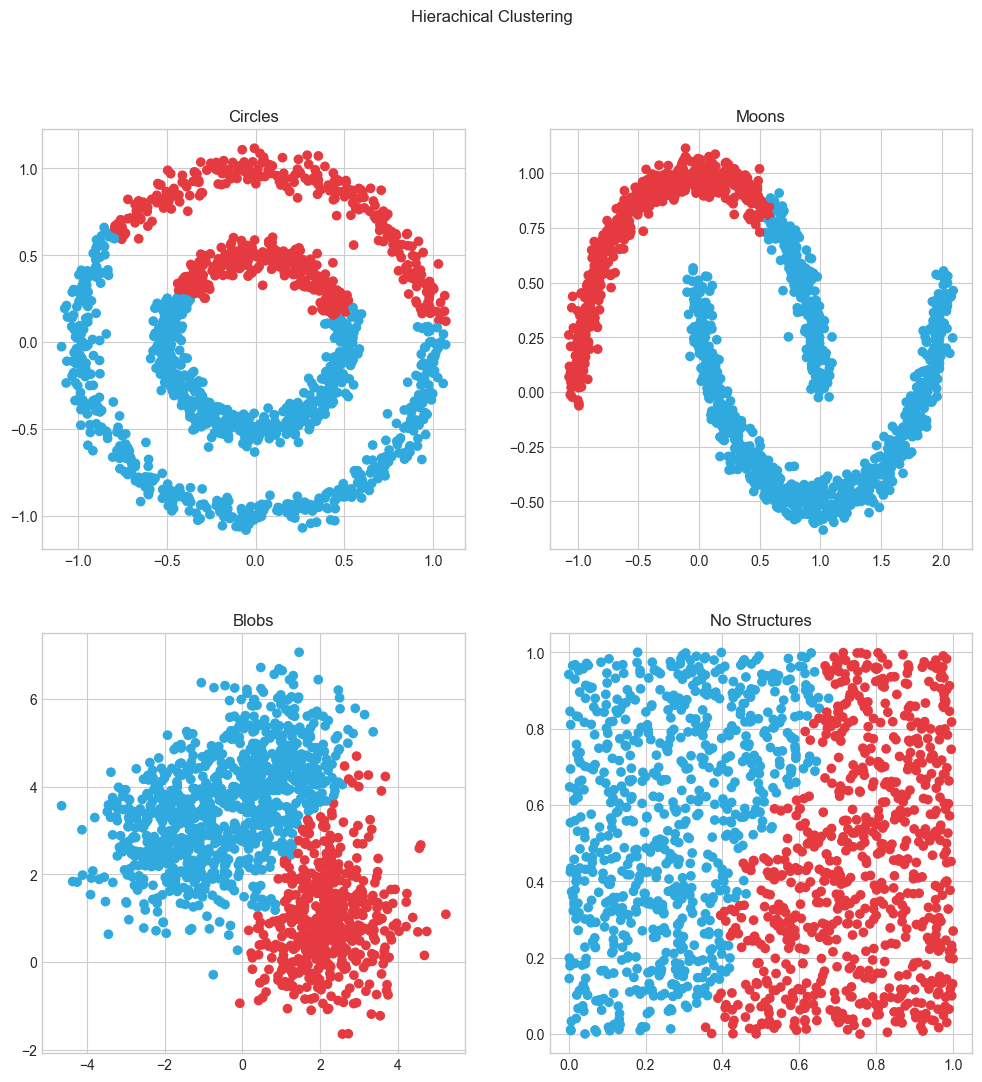

In [26]:
fig = plt.figure(figsize=(12, 12))
fig.suptitle('Hierachical Clustering')

fit_predict_plot(cluster.AgglomerativeClustering(n_clusters=2, linkage='ward'), circles, 221, 'Circles')
fit_predict_plot(cluster.AgglomerativeClustering(n_clusters=2, linkage='ward'), moons, 222, 'Moons')
fit_predict_plot(cluster.AgglomerativeClustering(n_clusters=2, linkage='ward'), blobs, 223, 'Blobs')
fit_predict_plot(cluster.AgglomerativeClustering(n_clusters=2, linkage='ward'), no_structures, 224, 'No Structures')

# 자동으로 나뉘어진 것을 알 수 있다. 
# No Structures data들은 군집을 지을만한 특징이 없다고 파악할 수 있다. (랜덤으로 만든 데이터였으니까)


### 와인 데이터 군집화

In [27]:
from sklearn.datasets import load_wine

wine = load_wine()

In [28]:
model = cluster.AgglomerativeClustering(n_clusters=3)
model.fit(wine.data)
predict = model.labels_

In [29]:
idx = np.where(predict==0)
wine.target[idx]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1])

In [30]:
idx = np.where(predict==1)
wine.target[idx]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2])

In [31]:
idx = np.where(predict==2)
wine.target[idx]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

* 밀도 기반 data에서 많이 쓰인다

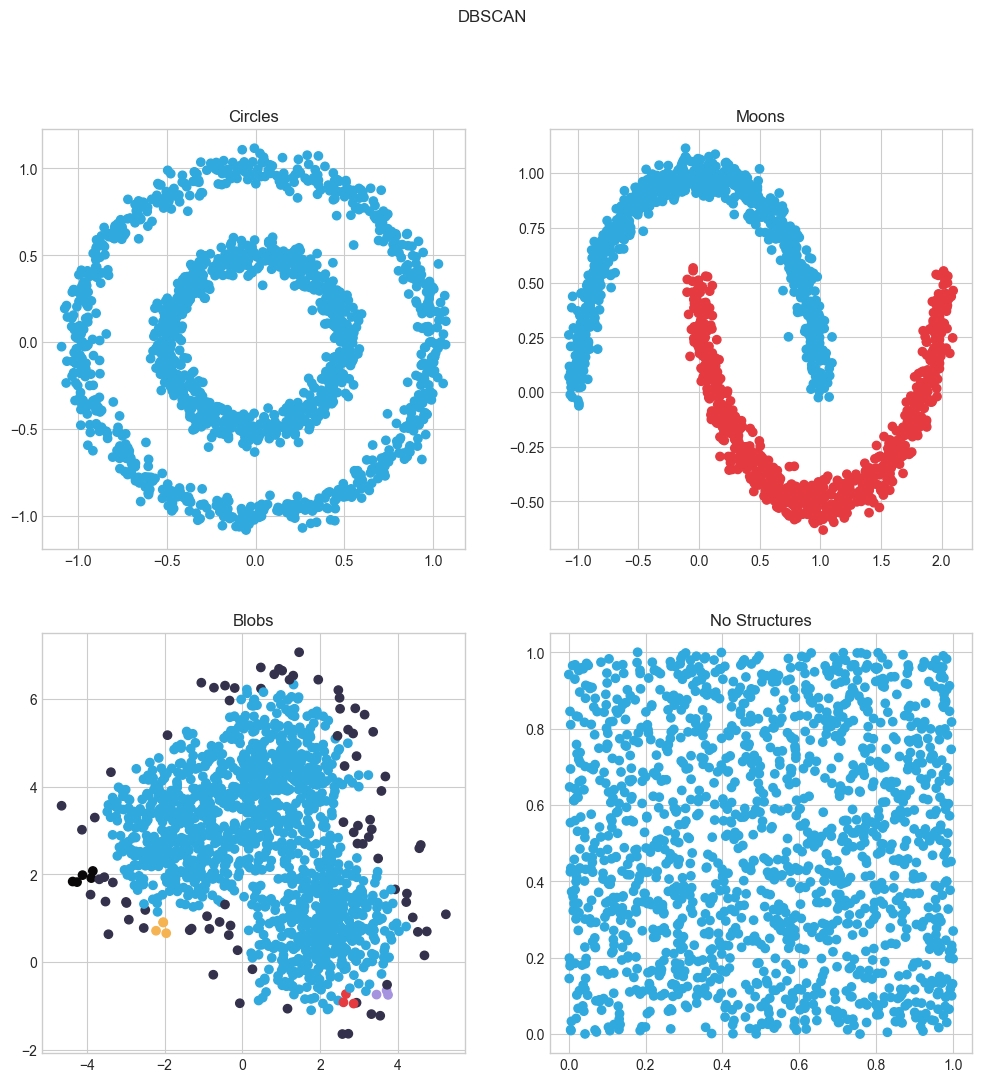

In [32]:
fig = plt.figure(figsize=(12, 12))
fig.suptitle('DBSCAN')

fit_predict_plot(cluster.DBSCAN(eps=0.3), circles, 221, 'Circles')
fit_predict_plot(cluster.DBSCAN(eps=0.3), moons, 222, 'Moons')
fit_predict_plot(cluster.DBSCAN(eps=0.3), blobs, 223, 'Blobs')
fit_predict_plot(cluster.DBSCAN(eps=0.3), no_structures, 224, 'No Structures')

# 자동으로 나뉘어진 것을 알 수 있다. 
# No Structures data들은 군집을 지을만한 특징이 없다고 파악할 수 있다. (랜덤으로 만든 데이터였으니까)


## OPTICS (Ordering Points To Identify the Clustering Structure)

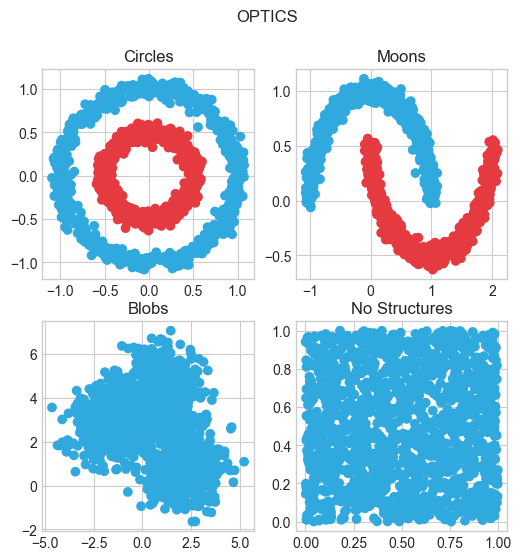

In [38]:
fig = plt.figure(figsize=(6, 6))
fig.suptitle('OPTICS')

fit_predict_plot(cluster.OPTICS(min_samples=20, xi=0.05, min_cluster_size=0.1), circles, 221, 'Circles')
fit_predict_plot(cluster.OPTICS(min_samples=20, xi=0.05, min_cluster_size=0.1), moons, 222, 'Moons')
fit_predict_plot(cluster.OPTICS(min_samples=20, xi=0.05, min_cluster_size=0.1), blobs, 223, 'Blobs')
fit_predict_plot(cluster.OPTICS(min_samples=20, xi=0.05, min_cluster_size=0.1), no_structures, 224, 'No Structures')

# 자동으로 나뉘어진 것을 알 수 있다. 
# No Structures data들은 군집을 지을만한 특징이 없다고 파악할 수 있다. (랜덤으로 만든 데이터였으니까)


## Birch (Balanced iterative reducing and clustering using hierarchies)

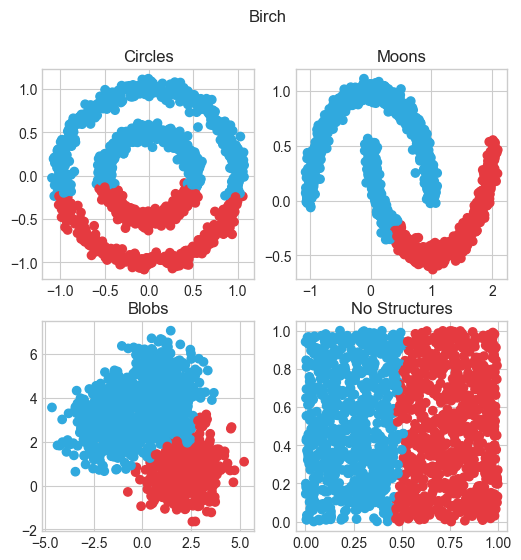

In [37]:
fig = plt.figure(figsize=(6, 6))
fig.suptitle('Birch')

fit_predict_plot(cluster.Birch(n_clusters=2, threshold=0.3), circles, 221, 'Circles')
fit_predict_plot(cluster.Birch(n_clusters=2, threshold=0.3), moons, 222, 'Moons')
fit_predict_plot(cluster.Birch(n_clusters=2, threshold=0.3), blobs, 223, 'Blobs')
fit_predict_plot(cluster.Birch(n_clusters=2, threshold=0.3), no_structures, 224, 'No Structures')

# 자동으로 나뉘어진 것을 알 수 있다. 
# No Structures data들은 군집을 지을만한 특징이 없다고 파악할 수 있다. (랜덤으로 만든 데이터였으니까)


## 손글씨 데이터 군집화

In [39]:
from sklearn.datasets import load_digits

digits = load_digits()
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [40]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [41]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [42]:
X = digits.data.reshape(-1, 8, 8)
y = digits.target

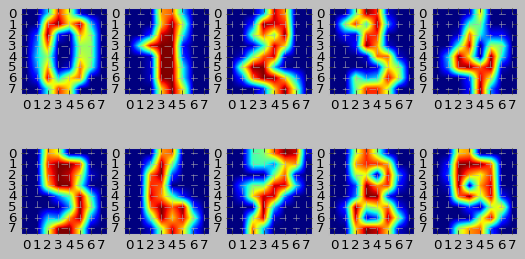

In [50]:
plt.style.use(['bmh']) # 'classic'
plt.figure(figsize=(8, 4))
for i in range(10) :
    plt.subplot(2, 5, i+1)
    plt.imshow(X[i])

### K-Means

In [51]:
kmeans = cluster.KMeans(n_clusters=10)
kmeans.fit(digits.data)
predict = kmeans.predict(digits.data)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [54]:
for i in range(10) :
    idx = np.where(predict==i)
    real_class = digits.target[idx]
    print('Cluster {} : {}' .format(i+1, real_class))

Cluster 1 : [4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 4 0 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 0 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
Cluster 2 : [2 8 8 8 8 8 2 2 8 8 8 8 2 2 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 6 8 2 8 8 8 8 8 8 8 9 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 2 2 8 8 2 8
 2 8 8 8 8 8 3 3 8 2 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 7 8 8 3 7 8 3 3 4 8 7 8 4 8 8 3
 8 8 8 8 8 3 3 3 8 3 8 8 8 8 8]
Cluster 3 : [3 5 9 3 9 3 9 9 9 9 3 3 3 3 3 9 3 3 3 9 3 9 9 9 9 3 9 3 9 3 9 9 9 9 3 3 3
 3 3 9 9 3 3 3 9 9 9 9 3 5 3 3 9 9 5 9 9 3 8 3 3 3 3 3 3 3 5 3 5 8 3 3 9 3
 9 3 9 9 5 5 9 9 3 8 3 3 3 3 9 5 9 3 3 9 3 3 9 9 9 9 3 9 3 5 9 3 5 9 5 5 9
 9 3 5 3 3 3 3 9 9 5 3 3 3 9 3 5 3 9 9 5 9 9 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3
 9

Cluster : 1


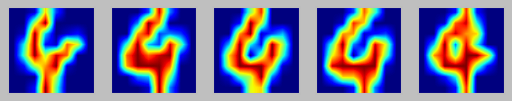

Cluster : 2


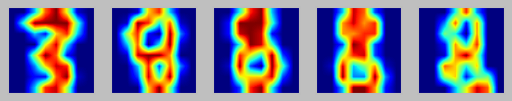

Cluster : 3


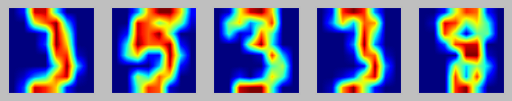

Cluster : 4


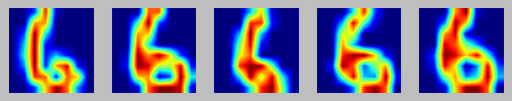

Cluster : 5


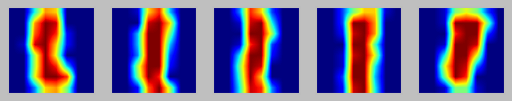

Cluster : 6


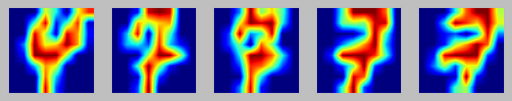

Cluster : 7


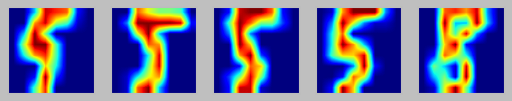

Cluster : 8


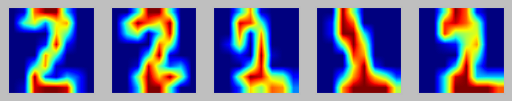

Cluster : 9


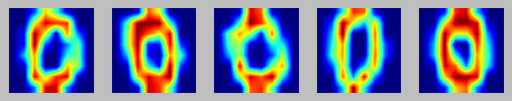

Cluster : 10


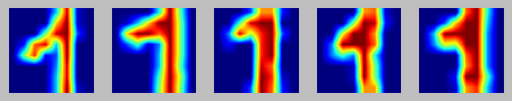

In [55]:
for i in range(10) : 
    idx = np.where(predict == i) [0]
    choice_idx = np.random.choice(idx, size=5) # 5개씩 후보 이미지 choice
    choice_image = X[choice_idx]

    k = 1
    print('Cluster : {}' .format(i+1))
    for image in choice_image :
        plt.subplot(1, 5, k)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(image)
        k += 1

    plt.show();


### Spectral Clustering

In [56]:
spectral = cluster.SpectralClustering(n_clusters=10, eigen_solver='arpack', affinity='nearest_neighbors')
spectral.fit(digits.data)
predict = spectral.labels_

In [57]:
for i in range(10) :
    idx = np.where(predict==i)
    real_class = digits.target[idx]
    print('Cluster {} : {}' .format(i+1, real_class))

Cluster 1 : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Cluster 2 : [1 2 8 8 8 8 8 2 2 8 2 2 9 2 8 2 1 8 1 3 8 2 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 1 8 1 8 1 8 8 8 1 1 8 1 8 1 1 1 1 8 1 1 8 8 8 8 8 8 8 8 8 8 6 2 8 8 8
 8 8 8 8 9 8 8 8 8 8 1 8 8 8 8 8 1 8 1 8 1 8 8 8 1 1 8 1 1 8 1 1 1 1 8 1 1
 8 8 8 8 8 1 8 1 1 8 8 8 1 1 8 1 8 1 1 1 1 8 1 1 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 1 8 1 8 1 8 8 8 1 1 8 1 1 9 8 1 1 1 1 8 1 1 8 8 8 8 8 8 8 1 8 8 8 1 3 8
 1 1 8 1 1 1 1 8 1 1 8 8 8 8 8 8 1 8 8 8 8 1 1 8 1 8 1 1 1 8 1 1 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 1 8 1 1 8 8 8 1 3 1 8 1 3 3 3 1 8 1 1 1 1 8 1 1 4 8
 8 1 8 1 8 1 8 8 8 1 3 1 8 1 3 3 1 8 1 1 1 1 8 1 1 8 8 8 8 8]
Cluster 3 : [4 4 4 4 4 4 4 

Cluster : 1


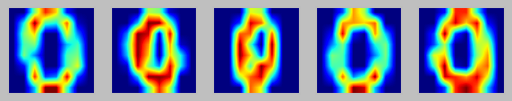

Cluster : 2


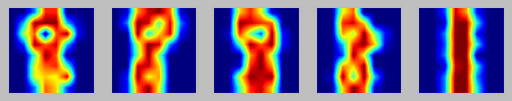

Cluster : 3


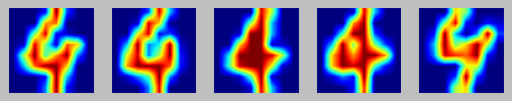

Cluster : 4


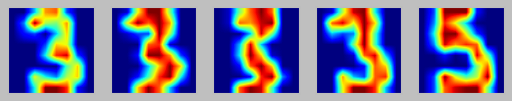

Cluster : 5


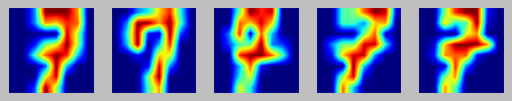

Cluster : 6


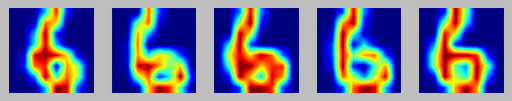

Cluster : 7


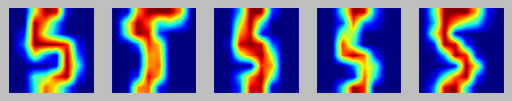

Cluster : 8


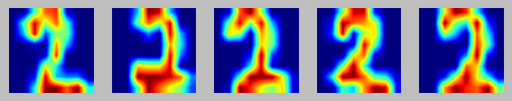

Cluster : 9


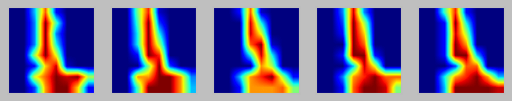

Cluster : 10


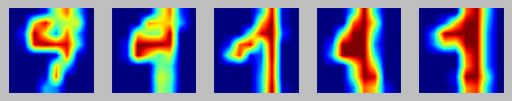

In [58]:
for i in range(10) : 
    idx = np.where(predict == i) [0]
    choice_idx = np.random.choice(idx, size=5) # 5개씩 후보 이미지 choice
    choice_image = X[choice_idx]

    k = 1
    print('Cluster : {}' .format(i+1))
    for image in choice_image :
        plt.subplot(1, 5, k)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(image)
        k += 1

    plt.show();


### Hierarchical Clustering

In [59]:
hierachical = cluster.AgglomerativeClustering(n_clusters=10, linkage='ward')
hierachical.fit(digits.data)
predict = hierachical.labels_

In [60]:
for i in range(10) :
    idx = np.where(predict==i)
    real_class = digits.target[idx]
    print('Cluster {} : {}' .format(i+1, real_class))

Cluster 1 : [5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 9 5 5 5 5 5 5 5 9 5 5 5 5 5 5 5 5 5 5 5 5 5]
Cluster 2 : [3 5 9 3 9 3 9 9 9 9 3 3 3 3 3 9 3 3 3 9 3 9 9 9 9 3 9 3 9 3 9 9 9 9 3 3 3
 3 3 9 9 3 3 3 9 3 3 9 9 9 3 3 3 9 9 9 9 3 3 3 3 3 3 3 3 3 3 3 3 9 3 9 3 9
 9 5 9 9 3 3 3 3 3 9 9 3 3 3 9 3 3 9 9 9 9 3 9 3 9 3 9 9 9 3 3 3 3 3 9 9 3
 3 3 9 3 3 9 9 9 9 3 3 3 3 3 3 3 3 3 3 3 3 3 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9
 9 3 3 3 9 3 3 9 9 9 9 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9 9 3 3 3 9 3 3 9 9 9 9
 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9 3 3 9 3 3 9 9 8 9 9 3 9 3 9 3 9 9 9 9 3 3 3
 3 9 9 3 3 3 9 3 3 9 9 9 9 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9 9 3 3 3 9 3 3 9 9
 9 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9 9 3 3 3 9 3 3 9 9 9 9 3 3 3 9 3 3 3 3 3 9
 9 3 9 9

Cluster : 1


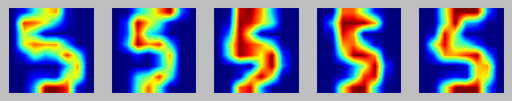

Cluster : 2


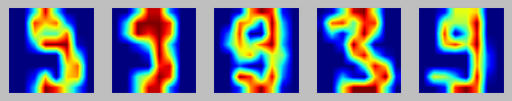

Cluster : 3


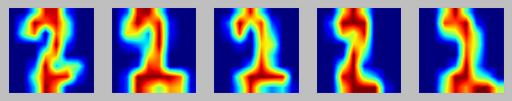

Cluster : 4


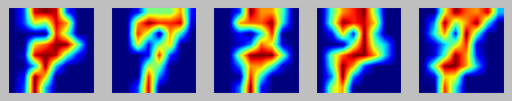

Cluster : 5


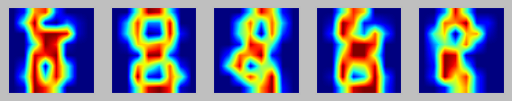

Cluster : 6


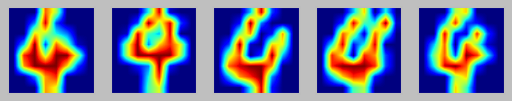

Cluster : 7


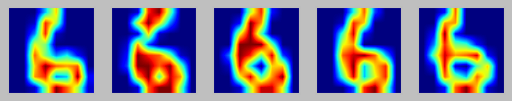

Cluster : 8


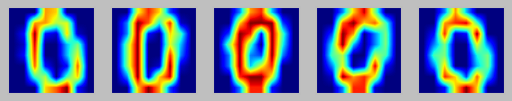

Cluster : 9


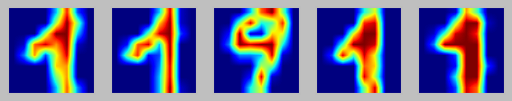

Cluster : 10


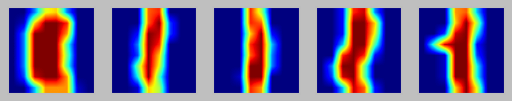

In [61]:
for i in range(10) : 
    idx = np.where(predict == i) [0]
    choice_idx = np.random.choice(idx, size=5) # 5개씩 후보 이미지 choice
    choice_image = X[choice_idx]

    k = 1
    print('Cluster : {}' .format(i+1))
    for image in choice_image :
        plt.subplot(1, 5, k)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(image)
        k += 1

    plt.show();


### Birch

In [62]:
birch = cluster.Birch(n_clusters=10, threshold=.3)
birch.fit(digits.data)
predict = birch.labels_

In [63]:
for i in range(10) :
    idx = np.where(predict==i)
    real_class = digits.target[idx]
    print('Cluster {} : {}' .format(i+1, real_class))

Cluster 1 : [5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 9 5 5 5 5 5 5 5 9 5 5 5 5 5 5 5 5 5 5 5 5 5]
Cluster 2 : [3 5 9 3 9 3 9 9 9 9 3 3 3 3 3 9 3 3 3 9 3 9 9 9 9 3 9 3 9 3 9 9 9 9 3 3 3
 3 3 9 9 3 3 3 9 3 3 9 9 9 3 3 3 9 9 9 9 3 3 3 3 3 3 3 3 3 3 3 3 9 3 9 3 9
 9 5 9 9 3 3 3 3 3 9 9 3 3 3 9 3 3 9 9 9 9 3 9 3 9 3 9 9 9 3 3 3 3 3 9 9 3
 3 3 9 3 3 9 9 9 9 3 3 3 3 3 3 3 3 3 3 3 3 3 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9
 9 3 3 3 9 3 3 9 9 9 9 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9 9 3 3 3 9 3 3 9 9 9 9
 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9 3 3 9 3 3 9 9 8 9 9 3 9 3 9 3 9 9 9 9 3 3 3
 3 9 9 3 3 3 9 3 3 9 9 9 9 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9 9 3 3 3 9 3 3 9 9
 9 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9 9 3 3 3 9 3 3 9 9 9 9 3 3 3 9 3 3 3 3 3 9
 9 3 9 9

Cluster : 1


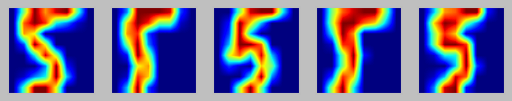

Cluster : 2


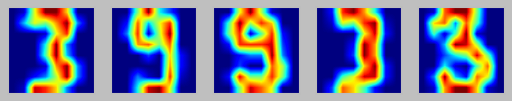

Cluster : 3


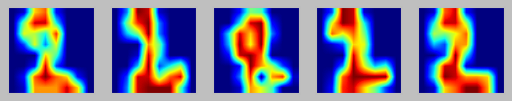

Cluster : 4


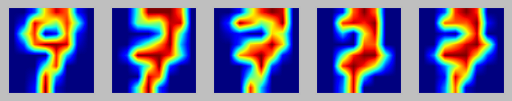

Cluster : 5


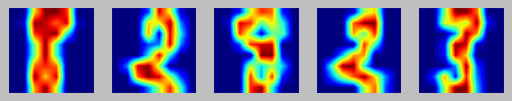

Cluster : 6


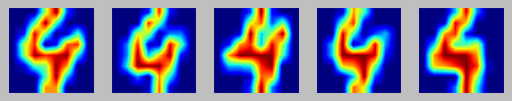

Cluster : 7


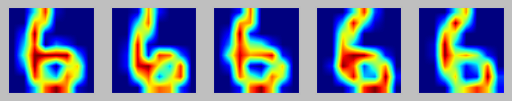

Cluster : 8


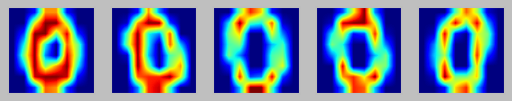

Cluster : 9


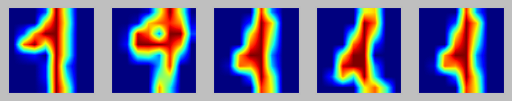

Cluster : 10


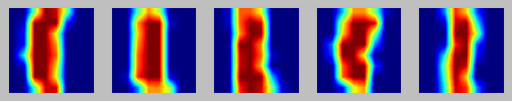

In [64]:
for i in range(10) : 
    idx = np.where(predict == i) [0]
    choice_idx = np.random.choice(idx, size=5) # 5개씩 후보 이미지 choice
    choice_image = X[choice_idx]

    k = 1
    print('Cluster : {}' .format(i+1))
    for image in choice_image :
        plt.subplot(1, 5, k)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(image)
        k += 1

    plt.show();
